### "Predictive Maintenance of Air Production Units in Metro Transit Trains: A Machine Learning Approach for Air Leak Failure Prediction"

In [2]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    log_loss,
    roc_auc_score,
    precision_score,
    recall_score,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)

import numpy as np 
import pandas as pd 

import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import html
import os



In [3]:
df = pd.read_csv('C:/Users/saven/OneDrive/Documents/ALY 6020/Final Project ALY 6020/Metro_dataset.csv', header=0 , parse_dates=['timestamp'], index_col ='timestamp')
df.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,20,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,30,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,40,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


### Intial Analysis

In [5]:
# Step 1: Understand the structure of the data
print("Shape of the dataset (Rows, Columns):", df.shape)
print("\nColumns in the dataset:\n", df.columns)

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:\n", df.head())

Shape of the dataset (Rows, Columns): (1516948, 16)

Columns in the dataset:
 Index(['Unnamed: 0', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

First 5 rows of the dataset:
                      Unnamed: 0    TP2    TP3     H1  DV_pressure  Reservoirs  \
timestamp                                                                       
2020-02-01 00:00:00           0 -0.012  9.358  9.340       -0.024       9.358   
2020-02-01 00:00:10          10 -0.014  9.348  9.332       -0.022       9.348   
2020-02-01 00:00:19          20 -0.012  9.338  9.322       -0.022       9.338   
2020-02-01 00:00:29          30 -0.012  9.328  9.312       -0.022       9.328   
2020-02-01 00:00:39          40 -0.012  9.318  9.302       -0.022       9.318   

                     Oil_temperature  Motor_current  COMP  DV_eletric  Towers  \
ti

In [6]:


# Basic Summary of the Dataset
print("Basic Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())

# Checking Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516

### Data Cleaning

In [8]:
# Renaming columns for legibility, and dropping the duplicate index
df =df.rename(columns={'DV_eletric':'DV_electric'}).drop(columns=['Unnamed: 0'], axis=1)

# Examining null count and data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1516948 non-null  float64
 1   TP3              1516948 non-null  float64
 2   H1               1516948 non-null  float64
 3   DV_pressure      1516948 non-null  float64
 4   Reservoirs       1516948 non-null  float64
 5   Oil_temperature  1516948 non-null  float64
 6   Motor_current    1516948 non-null  float64
 7   COMP             1516948 non-null  float64
 8   DV_electric      1516948 non-null  float64
 9   Towers           1516948 non-null  float64
 10  MPG              1516948 non-null  float64
 11  LPS              1516948 non-null  float64
 12  Pressure_switch  1516948 non-null  float64
 13  Oil_level        1516948 non-null  float64
 14  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15)
memory usage: 185.

In [9]:
# displaying summary statistics of the dataframe while suppressing scientific notation
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06,1.51695e+06
mean,1.36783,8.98461,7.56815,0.0559562,8.98523,62.6442,2.05017,0.836957,0.160611,0.919848,0.832664,0.00342002,0.991437,0.904156,0.937107
std,3.25093,0.639095,3.3332,0.382402,0.638307,6.51626,2.30205,0.369405,0.367172,0.271528,0.373276,0.0583809,0.0921408,0.294378,0.242771
min,-0.032,0.73,-0.036,-0.032,0.712,15.4,0.02,0,0,0,0,0,0,0,0
25%,-0.014,8.492,8.254,-0.022,8.494,57.775,0.04,1,0,1,1,0,1,1,1
50%,-0.012,8.96,8.784,-0.02,8.96,62.7,0.045,1,0,1,1,0,1,1,1
75%,-0.01,9.492,9.374,-0.018,9.492,67.25,3.8075,1,0,1,1,0,1,1,1
max,10.676,10.302,10.288,9.844,10.3,89.05,9.295,1,1,1,1,1,1,1,1


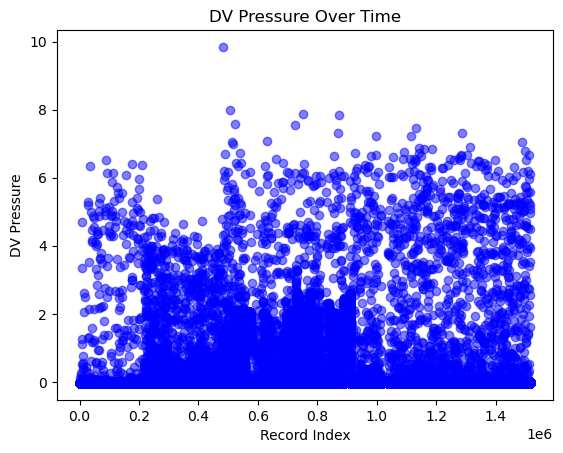

In [10]:
dv_pressures = df['DV_pressure']
integers = range(df.shape[0])

# Create the scatter plot with titles and labels
plt.scatter(integers, dv_pressures, c='blue', alpha=0.5)
plt.title('DV Pressure Over Time') 
plt.xlabel('Record Index')         
plt.ylabel('DV Pressure')           

# Display the plot
plt.show()


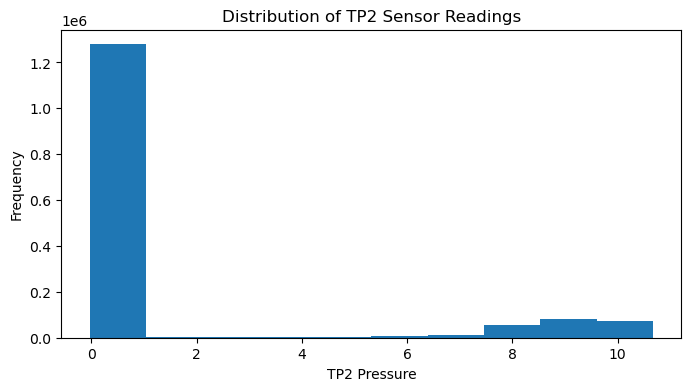

In [11]:
import matplotlib.pyplot as plt

pressures = df['TP2']

plt.figure(figsize=(8, 4))
plt.hist(pressures)  # You can adjust the number of bins for better visualization
plt.title('Distribution of TP2 Sensor Readings')  # Title for the plot
plt.xlabel('TP2 Pressure')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()


### Data Preprocessing

In [13]:
# Creating python string variable from the html table of failure data I created above
failure_table = """<table>
    <thead>
        <th>Failure Number</th>
        <th>Start Time</th>
        <th>End Time</th>
        <th>Failure Type</th>
        <th>Severity</th>
        <th>Report</th>
    </thead>
    <tr>
        <td>1</td>
        <td>4/18/2020 0:00</td>
        <td>4/18/2020 23:59</td>
        <td>Air leak</td>
        <td>High Stress</td>
        <td>N/A</td>
    </tr>
    <tr>
        <td>2</td>
        <td>5/29/2020 23:30</td>
        <td>5/30/2020 6:00</td>
        <td>Air leak</td>
        <td>High Stress</td>
        <td>Maintenance on 4/30/2020 12:00</td>
    </tr>
    <tr>
        <td>3</td>
        <td>6/5/2020 10:00</td>
        <td>6/7/2020 14:30</td>
        <td>Air leak</td>
        <td>High Stress</td>
        <td>Maintenance on 6/08/2020 16:00</td>
    </tr>
    <tr>
        <td>4</td>
        <td>7/15/2020 14:30</td>
        <td>7/15/2020 19:00</td>
        <td>Air leak</td>
        <td>High Stress</td>
        <td>Maintenance on 7/16/2020 00:00</td>
    </tr>
</table>"""

# Converting html table to to pandas dataframe
failures = pd.read_html(failure_table)[0]
failures

C:\Users\saven\AppData\Local\Temp\ipykernel_14480\270225322.py:46: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  failures = pd.read_html(failure_table)[0]


,Failure Number,Start Time,End Time,Failure Type,Severity,Report
0,1,4/18/2020 0:00,4/18/2020 23:59,Air leak,High Stress,NaN
1,2,5/29/2020 23:30,5/30/2020 6:00,Air leak,High Stress,Maintenance on 4/30/2020 12:00
2,3,6/5/2020 10:00,6/7/2020 14:30,Air leak,High Stress,Maintenance on 6/08/2020 16:00
3,4,7/15/2020 14:30,7/15/2020 19:00,Air leak,High Stress,Maintenance on 7/16/2020 00:00


In [14]:
# Removing rows that occur during failed periods to create a dataframe of records during normal operation
df_normal_operation = pd.DataFrame(df.loc[((df.index < failures['Start Time'][0]) | (df.index > failures['End Time'][0])) & 
                                          ((df.index < failures['Start Time'][1]) | (df.index > failures['End Time'][1])) &
                                          ((df.index < failures['Start Time'][2]) | (df.index > failures['End Time'][2])) &
                                          ((df.index < failures['Start Time'][3]) | (df.index > failures['End Time'][3]))])

df_normal_operation


,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [15]:
# Creating a dataframe of failure data from the provided failure table
dt_failure_starts = pd.to_datetime(failures['Start Time'])
dt_failure_ends = pd.to_datetime(failures['End Time'])

failure_ranges_week = [pd.date_range(start=(fail_start - pd.Timedelta(days=7)), end=fail_start) for fail_start in dt_failure_starts]
failure_ranges_day = [pd.date_range(start=(fail_start - pd.Timedelta(days=1)), end=fail_start) for fail_start in dt_failure_starts]
failure_ranges_hour = [pd.date_range(start=(fail_start - pd.Timedelta(hours=1)), end=fail_start) for fail_start in dt_failure_starts]

df_failures = pd.DataFrame(list(zip(failure_ranges_week, failure_ranges_day, failure_ranges_hour, dt_failure_starts, dt_failure_ends)), 
                           columns=['pre_failure_week', 'pre_failure_day', 'pre_failure_hour', 'failure_start', 'failure_end'])

# Using the explode method to create records that contain an hour, day, and week pre-failure related to each failure start time
for col in df_failures.columns:
    df_failures = df_failures.explode(col)

df_failures


,pre_failure_week,pre_failure_day,pre_failure_hour,failure_start,failure_end
0,2020-04-11 00:00:00,2020-04-17 00:00:00,2020-04-17 23:00:00,2020-04-18 00:00:00,2020-04-18 23:59:00
0,2020-04-11 00:00:00,2020-04-18 00:00:00,2020-04-17 23:00:00,2020-04-18 00:00:00,2020-04-18 23:59:00
0,2020-04-12 00:00:00,2020-04-17 00:00:00,2020-04-17 23:00:00,2020-04-18 00:00:00,2020-04-18 23:59:00
0,2020-04-12 00:00:00,2020-04-18 00:00:00,2020-04-17 23:00:00,2020-04-18 00:00:00,2020-04-18 23:59:00
0,2020-04-13 00:00:00,2020-04-17 00:00:00,2020-04-17 23:00:00,2020-04-18 00:00:00,2020-04-18 23:59:00
...,...,...,...,...,...
3,2020-07-13 14:30:00,2020-07-15 14:30:00,2020-07-15 13:30:00,2020-07-15 14:30:00,2020-07-15 19:00:00
3,2020-07-14 14:30:00,2020-07-14 14:30:00,2020-07-15 13:30:00,2020-07-15 14:30:00,2020-07-15 19:00:00
3,2020-07-14 14:30:00,2020-07-15 14:30:00,2020-07-15 13:30:00,2020-07-15 14:30:00,2020-07-15 19:00:00
3,2020-07-15 14:30:00,2020-07-14 14:30:00,2020-07-15 13:30:00,2020-07-15 14:30:00,2020-07-15 19:00:00


In [16]:
# Set 'pre_failure_hour' as index and sort for merging
df_hour_pre = df_failures.set_index(df_failures['pre_failure_hour']).sort_index()

# Define one-hour duration for merging records within an hour of failure
one_hour = pd.Timedelta(hours=1)

# Merge the normal operation data with pre-failure data within one hour of failure
df_hour_pre_failure = pd.merge_asof(df_normal_operation, df_hour_pre, left_index=True, right_index=True, tolerance=one_hour, direction='backward')

# Create binary column: 1 if the record is within one hour of failure, 0 otherwise
df_hour_pre_failure['pre_failure_hour_binary'] = np.where(df_hour_pre_failure['pre_failure_hour'].isna(), 0, 1)

# Set 'pre_failure_day' as index and sort for merging
df_day_pre = df_failures.set_index(df_failures['pre_failure_day']).sort_index()

# Define one-day duration for merging records within a day of failure
one_day = pd.Timedelta(1, "D")

# Merge normal operation data with pre-failure data within one day of failure
df_day_pre_failure = pd.merge_asof(df_normal_operation, df_day_pre, left_index=True, right_index=True, tolerance=one_day)

# Create binary column: 1 if the record is within a day of failure, 0 otherwise
df_day_pre_failure['pre_failure_day_binary'] = np.where(df_day_pre_failure['pre_failure_day'].isna(), 0, 1)

# Set 'pre_failure_week' as index and sort for merging
df_week_pre = df_failures.set_index(df_failures['pre_failure_week']).sort_index()

# Define one-week duration for merging records within a week of failure
one_week = pd.Timedelta(1, "W")

# Merge normal operation data with pre-failure data within one week of failure
df_week_pre_failure = pd.merge_asof(df_normal_operation, df_week_pre, left_index=True, right_index=True, tolerance=one_week)

# Create binary column: 1 if the record is within a week of failure, 0 otherwise
df_week_pre_failure['pre_failure_week_binary'] = np.where(df_week_pre_failure['pre_failure_week'].isna(), 0, 1)

# Value counts of new binary columns to verify the number of records
print(df_week_pre_failure['pre_failure_week_binary'].value_counts(), '\n')
print(df_day_pre_failure['pre_failure_day_binary'].value_counts(), '\n')
print(df_hour_pre_failure['pre_failure_hour_binary'].value_counts())

# Create a dataframe with the binary pre-failure columns
df_pre_failures = pd.DataFrame({
    'pre_failure_week': df_week_pre_failure['pre_failure_week_binary'],
    'pre_failure_day': df_day_pre_failure['pre_failure_day_binary'],
    'pre_failure_hour': df_hour_pre_failure['pre_failure_hour_binary']
})

# Merge binary pre-failure columns with the normal operation dataframe
df_model = df_normal_operation.merge(df_pre_failures, left_index=True, right_index=True)

df_model.head()


pre_failure_week_binary
0    1169154
1     317840
Name: count, dtype: int64 

pre_failure_day_binary
0    1445026
1      41968
Name: count, dtype: int64 

pre_failure_hour_binary
0    1485607
1       1387
Name: count, dtype: int64


,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,pre_failure_week,pre_failure_day,pre_failure_hour
timestamp,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0


In [17]:
# Creating smaller dataframes of relevant periods
# This allows for more efficient analysis and plotting

df_hour_pre_failure = df_model[df_model['pre_failure_hour'] == 1]
df_day_pre_failure = df_model[df_model['pre_failure_day'] == 1]
df_week_pre_failure = df_model[df_model['pre_failure_week'] == 1]

df_failure_period_1 = df_model[:failures['Start Time'][0]]
df_failure_period_2 = df_model[failures['End Time'][0]:failures['Start Time'][1]]
df_failure_period_3 = df_model[failures['End Time'][1]:failures['Start Time'][2]]
df_failure_period_4 = df_model[failures['End Time'][2]:failures['Start Time'][3]]

# Creating binary features in the main model dataframe where 1 indicates a record in the period between prior failure_end and subsequent failure_start
# This allows evaluation of aggregate statistics of the dataframe grouped by individual failure
df_model['is_failure_period_1'] = df_model.index < failures['Start Time'][0]
df_model['is_failure_period_2'] = (df_model.index > failures['End Time'][0]) & (df_model.index < failures['Start Time'][1])
df_model['is_failure_period_3'] = (df_model.index > failures['End Time'][1]) & (df_model.index < failures['Start Time'][2])
df_model['is_failure_period_4'] = (df_model.index > failures['End Time'][2]) & (df_model.index < failures['Start Time'][3])


### EDA


 Correlations between pre_failure_week and features: 
 pre_failure_week       1.000000
is_failure_period_3    0.349191
pre_failure_day        0.326853
is_failure_period_2    0.141686
Oil_temperature        0.123102
Oil_level              0.097581
is_failure_period_4    0.083065
pre_failure_hour       0.058603
Caudal_impulses        0.053297
LPS                    0.028609
DV_electric            0.019743
Motor_current          0.012676
DV_pressure            0.008222
H1                     0.004146
TP2                   -0.006293
TP3                   -0.008548
Reservoirs            -0.008583
COMP                  -0.014352
Towers                -0.032104
MPG                   -0.037071
Pressure_switch       -0.067335
is_failure_period_1   -0.247946
Name: pre_failure_week, dtype: float64


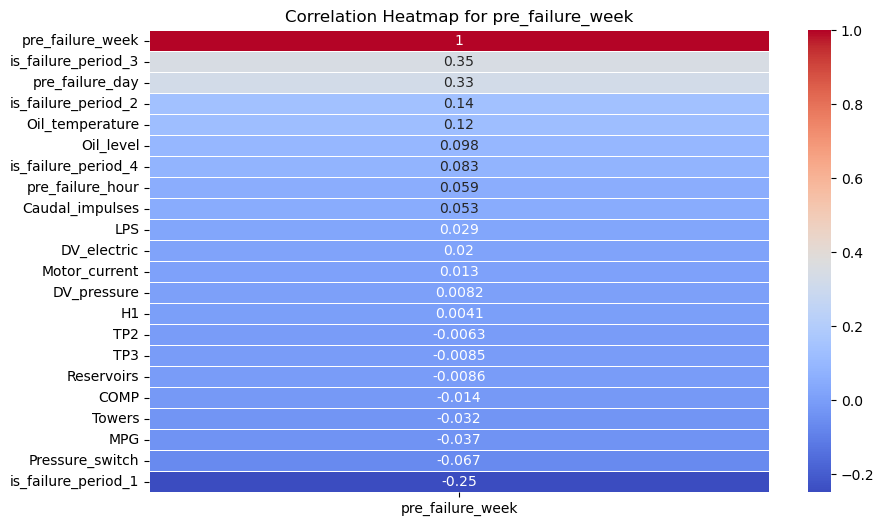


 Correlations between pre_failure_day and features: 
 pre_failure_day        1.000000
pre_failure_week       0.326853
is_failure_period_3    0.313968
pre_failure_hour       0.179294
Oil_temperature        0.057313
Oil_level              0.030557
Caudal_impulses        0.029867
Motor_current          0.012231
TP2                    0.006841
DV_electric            0.003261
is_failure_period_2   -0.001420
LPS                   -0.007417
H1                    -0.008362
MPG                   -0.010029
COMP                  -0.012263
Reservoirs            -0.012994
TP3                   -0.013006
is_failure_period_4   -0.013164
DV_pressure           -0.014868
Towers                -0.016216
Pressure_switch       -0.025766
is_failure_period_1   -0.080185
Name: pre_failure_day, dtype: float64


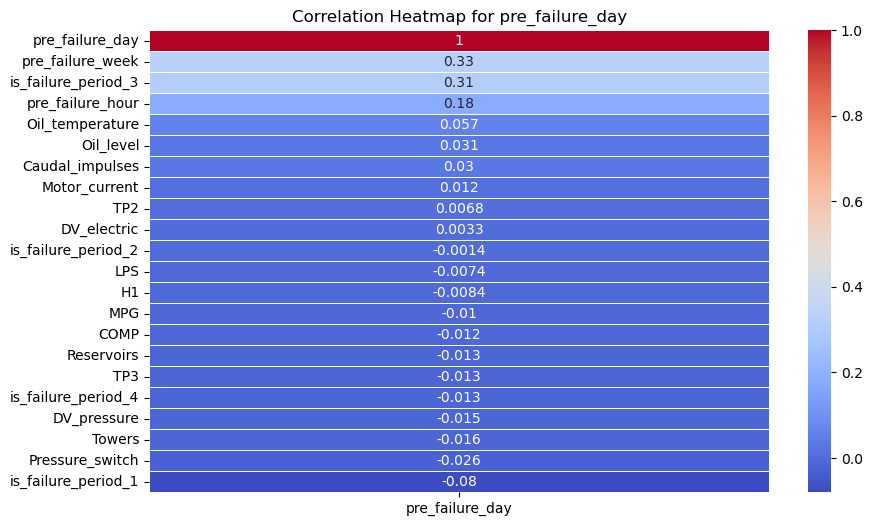


 Correlations between pre_failure_hour and features: 
 pre_failure_hour       1.000000
pre_failure_day        0.179294
pre_failure_week       0.058603
is_failure_period_3    0.039815
DV_pressure            0.021771
TP2                    0.017789
DV_electric            0.017174
Oil_temperature        0.014248
Motor_current          0.009013
is_failure_period_4    0.006797
is_failure_period_2    0.006382
Oil_level              0.005162
Caudal_impulses        0.002065
LPS                   -0.001676
TP3                   -0.006359
Reservoirs            -0.006403
is_failure_period_1   -0.010299
Pressure_switch       -0.013584
Towers                -0.017203
H1                    -0.018798
MPG                   -0.020326
COMP                  -0.020954
Name: pre_failure_hour, dtype: float64


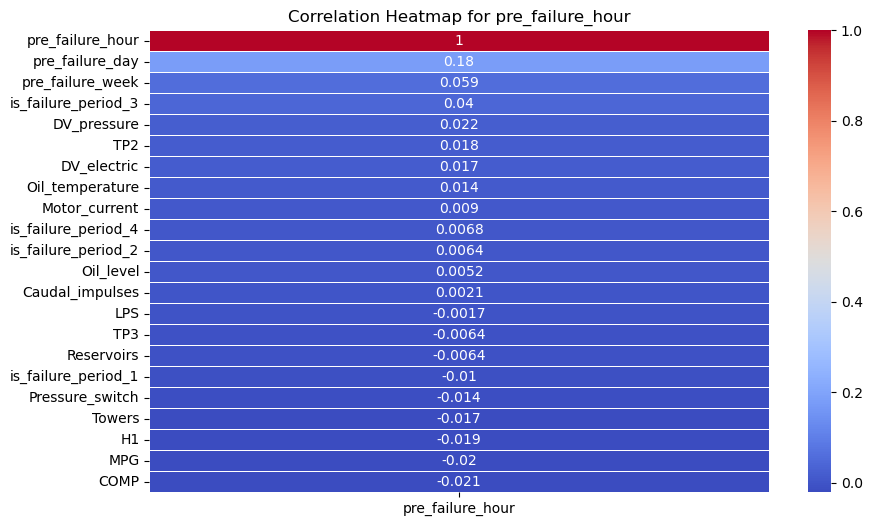

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This calculates the correlation between each feature and all of the others
correlation_matrix = df_model.corr()

# Loop through the selected columns and print correlations as well as plot a heatmap
for column in ['pre_failure_week', 'pre_failure_day', 'pre_failure_hour']:
    # Print the correlations sorted in descending order
    print('\n Correlations between ' f'{column}' + ' and features: \n', correlation_matrix[column].sort_values(ascending=False))
    
    # Plotting the correlation heatmap for the current column
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix[[column]].sort_values(by=column, ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for {column}')
    plt.show()


In [20]:
# Calculating the mean Oil Temperature grouped by pre_failure_week
oil_temperature_mean_comparison = df_model.groupby('pre_failure_week')['Oil_temperature'].mean()
oil_temperature_mean_comparison


pre_failure_week
0    61.978839
1    63.870764
Name: Oil_temperature, dtype: float64

In [21]:
# Calculating the value counts of Oil Level grouped by pre_failure_week
oil_level_counts = df_model.groupby('pre_failure_week')['Oil_level'].value_counts()

# Calculating the oil level ratio for normal operation and week pre-failure periods
normal_operation_oil_level_ratio = oil_level_counts[0][1] / oil_level_counts[0][0]
pre_failure_week_oil_level_ratio = oil_level_counts[1][1] / oil_level_counts[1][0]

print('Low Oil Level ratio during Normal Operation: ' + f'{normal_operation_oil_level_ratio}' + '\n\n' +
      'Low Oil Level ratio during Week Pre Failure: ' + f'{pre_failure_week_oil_level_ratio}')
print('\n', oil_level_counts)


Low Oil Level ratio during Normal Operation: 7.859576402834085

Low Oil Level ratio during Week Pre Failure: 22.70878711024914

 pre_failure_week  Oil_level
0                 1.0          1037189
                  0.0           131965
1                 1.0           304434
                  0.0            13406
Name: count, dtype: int64


In [22]:
# Calculating the value counts of Pressure Switch grouped by pre_failure_week
pressure_switch_counts = df_model.groupby('pre_failure_week')['Pressure_switch'].value_counts()

# Calculating the pressure switch ratio for normal operation and week pre-failure periods
normal_operation_pressure_switch_ratio = pressure_switch_counts[0][0] / pressure_switch_counts[0][1]
pre_failure_week_pressure_switch_ratio = pressure_switch_counts[1][0] / pressure_switch_counts[1][1]

print('Pressure Switch ratio during Normal Operation: ' + f'{normal_operation_pressure_switch_ratio}' + '\n\n' +
      'Pressure Switch ratio during Week Pre Failure: ' + f'{pre_failure_week_pressure_switch_ratio}')
print('\n', pressure_switch_counts)


Pressure Switch ratio during Normal Operation: 0.005410788210466934

Pressure Switch ratio during Week Pre Failure: 0.021005393493756845

 pre_failure_week  Pressure_switch
0                 1.0                1162862
                  0.0                   6292
1                 1.0                 311301
                  0.0                   6539
Name: count, dtype: int64


In [23]:
# Calculating the value counts of Caudal Impulses grouped by pre_failure_week
caudal_impulses_counts = df_model.groupby('pre_failure_week')['Caudal_impulses'].value_counts()

# Calculating the caudal impulse ratio for normal operation and week pre-failure periods
normal_operation_caudal_impulse_ratio = caudal_impulses_counts[0][1] / caudal_impulses_counts[0][0]
pre_failure_week_caudal_impulse_ratio = caudal_impulses_counts[1][1] / caudal_impulses_counts[1][0]

print('Caudal Impulse ratio during Normal Operation: ' + f'{normal_operation_caudal_impulse_ratio}' + '\n\n' +
      'Caudal Impulse ratio during Week Pre Failure: ' + f'{pre_failure_week_caudal_impulse_ratio}')
print('\n', caudal_impulses_counts)


Caudal Impulse ratio during Normal Operation: 13.093324332794909

Caudal Impulse ratio during Week Pre Failure: 24.574509172835533

 pre_failure_week  Caudal_impulses
0                 1.0                1086196
                  0.0                  82958
1                 1.0                 305412
                  0.0                  12428
Name: count, dtype: int64


In [24]:
# Calculating the average DV pressure grouped by pre_failure_hour
dv_pressure_average = df_model.groupby('pre_failure_hour')['DV_pressure'].mean()
dv_pressure_average


pre_failure_hour
0    0.019435
1    0.217172
Name: DV_pressure, dtype: float64

In [25]:
# Calculating the value counts of COMP grouped by pre_failure_hour
comp_counts_grouped = df_model.groupby('pre_failure_hour')['COMP'].value_counts()

# Calculating the COMP ratio for normal operation and hour pre-failure periods
normal_operation_comp_ratio = comp_counts_grouped[0][0] / comp_counts_grouped[0][1]
pre_failure_hour_comp_ratio = comp_counts_grouped[1][0] / comp_counts_grouped[1][1]

print('COMP ratio during Normal Operation: ' + f'{normal_operation_comp_ratio}' + '\n\n' +
      'COMP ratio during Hour Pre Failure: ' + f'{pre_failure_hour_comp_ratio}')
print('\n', comp_counts_grouped)


COMP ratio during Normal Operation: 0.17102422359709893

COMP ratio during Hour Pre Failure: 0.6356132075471698

 pre_failure_hour  COMP
0                 1.0     1268639
                  0.0      216968
1                 1.0         848
                  0.0         539
Name: count, dtype: int64


In [26]:
# Calculating the value counts of MPG grouped by pre_failure_hour
mpg_counts_grouped = df_model.groupby('pre_failure_hour')['MPG'].value_counts()

# Calculating the MPG ratio for normal operation and hour pre-failure periods
normal_operation_mpg_ratio = mpg_counts_grouped[0][0] / mpg_counts_grouped[0][1]
pre_failure_hour_mpg_ratio = mpg_counts_grouped[1][0] / mpg_counts_grouped[1][1]

print('MPG ratio during Normal Operation: ' + f'{normal_operation_mpg_ratio}' + '\n\n' +
      'MPG ratio during Hour Pre Failure: ' + f'{pre_failure_hour_mpg_ratio}')
print('\n', mpg_counts_grouped)


MPG ratio during Normal Operation: 0.17706617479857414

MPG ratio during Hour Pre Failure: 0.6356132075471698

 pre_failure_hour  MPG
0                 1.0    1262127
                  0.0     223480
1                 1.0        848
                  0.0        539
Name: count, dtype: int64


In [27]:
# Creating a column for the difference in air pressure between the pneumatic panel and the reservoirs
df_model['air_pressure_diff'] = df_model['TP3'] - df_model['Reservoirs']

# Calculating average air pressure difference for week pre-failure
air_pressure_diff_week = df_model.groupby('pre_failure_week')['air_pressure_diff'].mean()
print("Reservoir minus Pneumatic Panel Pressure Average: Pre-Fail Week vs Normal: " + f'{air_pressure_diff_week[0] - air_pressure_diff_week[1]:.20f}' + '\n')

# Calculating average air pressure difference for day pre-failure
air_pressure_diff_day = df_model.groupby('pre_failure_day')['air_pressure_diff'].mean()
print("Reservoir minus Pneumatic Panel Pressure Average: Pre-Fail Day vs Normal: " + f'{air_pressure_diff_day[0] - air_pressure_diff_day[1]}' + '\n')

# Calculating average air pressure difference for hour pre-failure
air_pressure_diff_hour = df_model.groupby('pre_failure_hour')['air_pressure_diff'].mean()
print("Reservoir minus Pneumatic Panel Pressure Average: Pre-Fail Hour vs Normal: " + f'{air_pressure_diff_hour[0] - air_pressure_diff_hour[1]}')


Reservoir minus Pneumatic Panel Pressure Average: Pre-Fail Week vs Normal: -0.00003738404320526728

Reservoir minus Pneumatic Panel Pressure Average: Pre-Fail Day vs Normal: 0.00010760544175336965

Reservoir minus Pneumatic Panel Pressure Average: Pre-Fail Hour vs Normal: -0.0007502015980631967


TP2            0.942886
TP3            0.999993
H1             0.968176
Reservoirs     0.999993
COMP           0.982828
DV_electric    0.942886
MPG            0.982828
dtype: float64


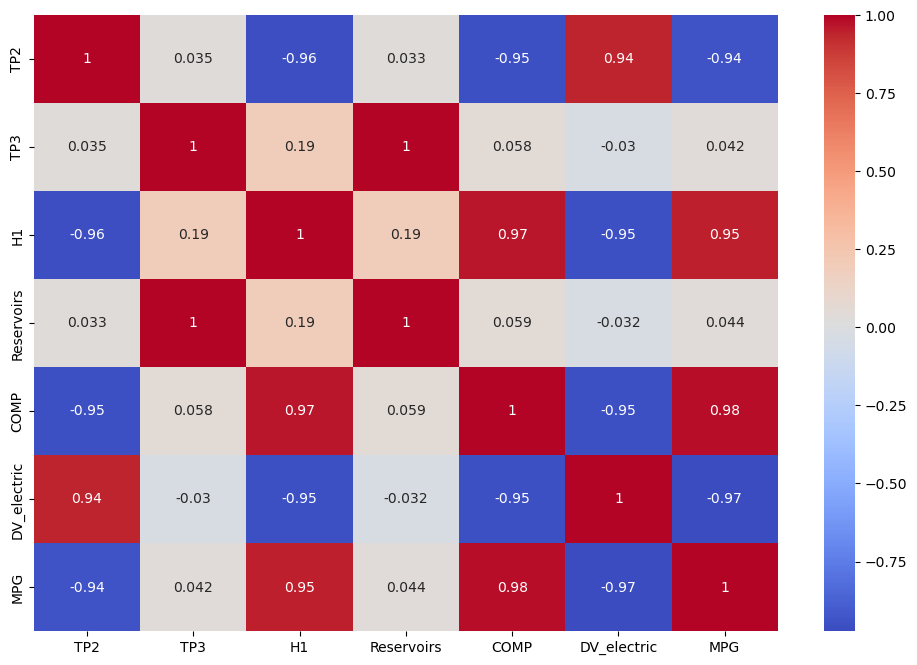

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Calculate the correlation between each feature and all of the others
correlation_matrix = df_model.corr()

# Selecting only correlations greater than 0.75 and not equal to 1 (ignores self-correlations)
high_correlation_values = correlation_matrix[(correlation_matrix > 0.75) & (correlation_matrix != 1)].abs().max()
print(high_correlation_values[~high_correlation_values.isna()])

# Selecting a subset of features for correlation analysis
correlation_subset = df_model[['TP2', 'TP3', 'H1', 'Reservoirs', 'COMP', 'DV_electric', 'MPG']].corr()

# Creating and plotting the heatmap with custom color palette
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm')

# Display the plot
plt.show()


In [29]:
# Dropping the highly correlated columns
df_model = df_model.drop(columns=['H1', 'COMP', 'DV_electric'])


In [30]:
# Resetting the index to sequential integers and dropping the datetime column entirely,
# saving a dataframe with datetime index for later feature generation.
df_model_with_datetime = df_model
df_model = df_model.reset_index(drop=True)
df_model.head()


,TP2,TP3,DV_pressure,Reservoirs,Oil_temperature,Motor_current,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,pre_failure_week,pre_failure_day,pre_failure_hour,is_failure_period_1,is_failure_period_2,is_failure_period_3,is_failure_period_4,air_pressure_diff
0,-0.012,9.358,-0.024,9.358,53.600,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
1,-0.014,9.348,-0.022,9.348,53.675,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
2,-0.012,9.338,-0.022,9.338,53.600,0.0425,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
3,-0.012,9.328,-0.022,9.328,53.425,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
4,-0.012,9.318,-0.022,9.318,53.475,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0


###  Model

In [32]:
# Creating the X data from the pertinent columns of the model-ready dataframe
X = df_model[['TP2', 'TP3', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]

# Declaring the target column of pre_failure_week as the y or target data
y = df_model['pre_failure_week']

# Splitting the data into training and testing, stratifying by the y variable of pre_failure_week as it has a greatly imbalanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Using scikit-learn's StandardScaler, fitting it on only the X_train data, then transforming both X_train and X_test data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# Checking the counts of True/False values in the training and test target datasets
print(y_train.value_counts())
print(y_test.value_counts())

pre_failure_week
0    818407
1    222488
Name: count, dtype: int64
pre_failure_week
0    350747
1     95352
Name: count, dtype: int64


### Model 1 Logistic Regression Model

           Feature  Importance
5              MPG   -1.236887
0              TP2   -1.109933
4    Motor_current   -0.323700
7  Pressure_switch   -0.227596
2       Reservoirs   -0.008291
6              LPS   -0.002857
1              TP3    0.008140
9  Caudal_impulses    0.387577
3  Oil_temperature    0.569275
8        Oil_level    0.598729
Accuracy: 0.7837116873160442
Precision: 0.42407605784681307
Recall: 0.033213776323517075
F1 Score: 0.7033169748158343


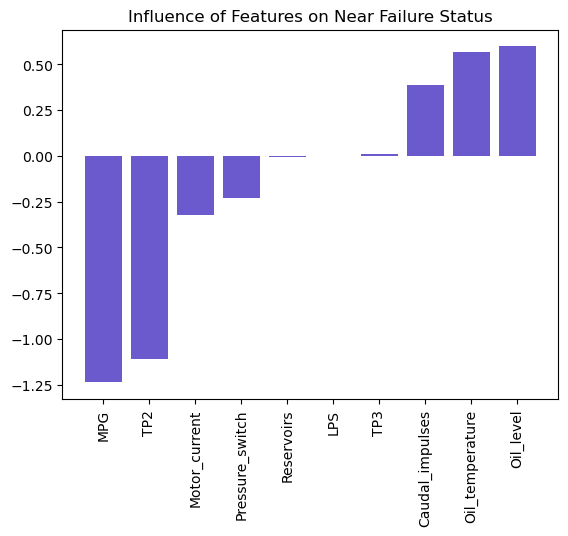

In [35]:
# Instantiating a scikit-learn Logistic Regression model with class weights set to counteract the imbalanced target classes
logreg_model = LogisticRegression(random_state=17)

# Fitting the model with the training data
logreg_model.fit(X_train, y_train)

# Predicting target values from the test data
y_pred_logreg = logreg_model.predict(X_test)

# Accessing the feature importance of the model after fitting
feature_importance_df = pd.DataFrame(data={"Feature": X.columns, "Importance": logreg_model.coef_[0]}).sort_values(by='Importance')
print(feature_importance_df)
# Calculating and printing model evaluation metrics
print("Accuracy:", accuracy_score(y_test,y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))

# Plotting the feature importances as a bar chart
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"],color='slateblue')
plt.xticks(rotation=90)
plt.title("Influence of Features on Near Failure Status")
plt.show()


In [47]:
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

### Model 2: XGBoost Classifier (A)

              precision    recall  f1-score   support

           0       0.82      0.99      0.90    350747
           1       0.81      0.20      0.31     95352

    accuracy                           0.82    446099
   macro avg       0.81      0.59      0.60    446099
weighted avg       0.82      0.82      0.77    446099

0.4080670306905439
0.7873734551116531


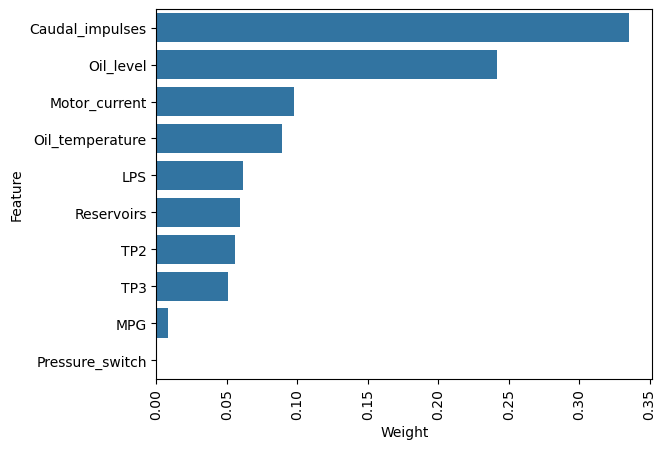

In [50]:
# Instantiating an XGBoost Classifier model for binary classification via logistic regression
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=17)

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions of near failure True/False on the test data
y_pred_xgb1 = xgb_model.predict(X_test)
y_pred_proba_xgb1 = xgb_model.predict_proba(X_test)

# Using scikit-learn's classification report to calculate and display model evaluation metrics
print(classification_report(y_test, y_pred_xgb1))

# Calculate log loss
print(log_loss(y_test,y_pred_proba_xgb1 ))

# Calculate ROC AUC
print(roc_auc_score(y_test, y_pred_proba_xgb1[:,1]))

# Extracting the feature importances from the xgb_model, appending the column names to them as a dataframe, and plotting them as a barplot
important_features = pd.DataFrame(data=zip(X.columns, xgb_model.feature_importances_), columns=["Feature","Weight"])

sns.barplot(data=important_features, x="Weight", y="Feature", order=important_features.sort_values("Weight", ascending=False).Feature)
plt.xticks(rotation=90)
plt.show()


In [52]:
xgb1_accuracy = accuracy_score(y_test, y_pred_xgb1)
xgb1_precision = precision_score(y_test, y_pred_xgb1)
xgb1_recall = recall_score(y_test, y_pred_xgb1)
xgb1_f1 = f1_score(y_test, y_pred_xgb1)
xgb1_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb1[:, 1])


In [54]:
df_model_with_datetime['Oil_level_rolling_sum_hour'] = df_model_with_datetime['Oil_level'].rolling(window=pd.Timedelta(hours=1)).sum().fillna(0)
df_model_with_datetime['Oil_level_rolling_sum_day'] = df_model_with_datetime['Oil_level'].rolling(window=pd.Timedelta(days=1)).sum().fillna(0)
df_model_with_datetime['Oil_level_rolling_sum_week'] = df_model_with_datetime['Oil_level'].rolling(window=pd.Timedelta(weeks=1)).sum().fillna(0)

df_model_with_datetime['Oil_temp_rolling_avg'] = df_model_with_datetime['Oil_temperature'].rolling(window=pd.Timedelta(hours=1)).mean().fillna(0)
df_model_with_datetime['Oil_temp_rolling_avg_day'] = df_model_with_datetime['Oil_temperature'].rolling(window=pd.Timedelta(days=1)).mean().fillna(0)
df_model_with_datetime['Oil_temp_rolling_avg_week'] = df_model_with_datetime['Oil_temperature'].rolling(window=pd.Timedelta(weeks=1)).mean().fillna(0)

df_model_with_datetime['motor_current_rolling_avg'] = df_model_with_datetime['Motor_current'].rolling(window=pd.Timedelta(days=3)).mean().fillna(0)

df_model_with_datetime['panel_reservoir_diff'] = df_model_with_datetime['TP3'] - df_model_with_datetime['Reservoirs']
df_model_with_datetime['pnl_res_dif_rlng_avg_day'] = df_model_with_datetime['panel_reservoir_diff'].rolling(window=pd.Timedelta(days=1)).mean().fillna(0)
df_model_with_datetime['pnl_res_dif_rlng_avg_week'] = df_model_with_datetime['panel_reservoir_diff'].rolling(window=pd.Timedelta(weeks=1)).mean().fillna(0)


### XGBoost Classifier (B)

In [57]:
# Creating the X data from the pertinent columns of the model-ready dataframe
X2 = df_model_with_datetime[['TP3', 'Reservoirs', 'LPS', 'Oil_level', 'Oil_level_rolling_sum_week', 'Oil_temperature',
                             'Oil_temp_rolling_avg_day', 'Oil_temp_rolling_avg_week', 'panel_reservoir_diff',
                             'pnl_res_dif_rlng_avg_day', 'pnl_res_dif_rlng_avg_week']]

# Declaring the target column of pre_fail_week as the y or target data
y2 = df_model_with_datetime['pre_failure_week']

# Splitting the data into training and testing, stratifying by the y variable of pre_fail_week as it has greatly imbalanced class distribution
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, stratify=y2)

# Using scikit-learn's StandardScaler, fitting it on only the X_train data, then transforming both X_train and X_test data
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)


In [59]:
# Instantiating an XGBoost Classifier model for binary classification
xgb_model2 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=17)

# Fitting the model to the training data
xgb_model2.fit(X_train2, y_train2)

# Making predictions of near failure True/False on the test data
y_pred2_xgb = xgb_model2.predict(X_test2)
y_pred_proba2 = xgb_model2.predict_proba(X_test2)

# Using scikit-learn's classification report to calculate and display model evaluation metrics
print(classification_report(y_test2, y_pred2_xgb))

# Calculate log loss
print(log_loss(y_test2, y_pred_proba2))

# Calculate ROC AUC
print(roc_auc_score(y_test2, y_pred_proba2[:,1] > 0.55))

# Calculate accuracy score
print(accuracy_score(y_test2, y_pred2_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    350747
           1       0.99      1.00      0.99     95352

    accuracy                           1.00    446099
   macro avg       1.00      1.00      1.00    446099
weighted avg       1.00      1.00      1.00    446099

0.037641592509116834
0.9972250297820793
0.9975431462522892


In [60]:
xgb2_accuracy = accuracy_score(y_test2, y_pred2_xgb)
print(xgb2_accuracy)
xgb2_precision = precision_score(y_test2, y_pred2_xgb)
print(xgb2_precision)
xgb2_recall = recall_score(y_test2,y_pred2_xgb)
print(xgb2_recall)
xgb2_f1 = f1_score(y_test2, y_pred2_xgb)
print(xgb2_f1) 



0.9975431462522892
0.9928985295040476
0.9956267304304053
0.994260758459621


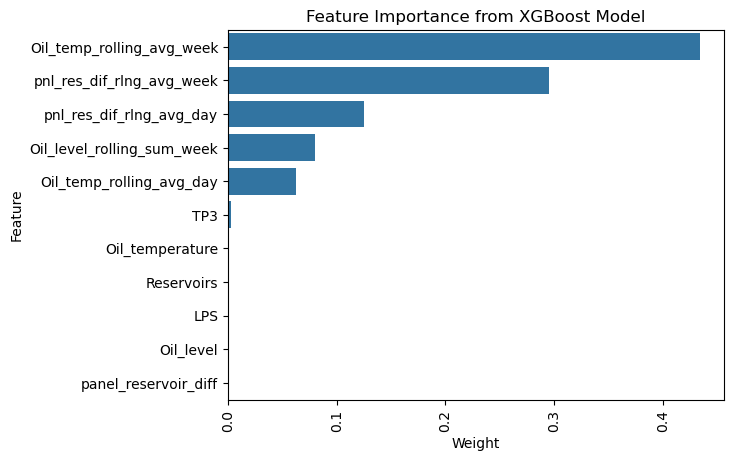

In [63]:
# Extracts the feature importances from the xgb_model2, appends the column names to them as a dataframe, and plots them as a barplot
important_features = pd.DataFrame(data=zip(X2.columns, xgb_model2.feature_importances_), columns=["Feature", "Weight"])

# Plotting the feature importance using seaborn
sns.barplot(data=important_features, x="Weight", y="Feature", order=important_features.sort_values("Weight", ascending=False).Feature)
plt.xticks(rotation=90)
plt.title("Feature Importance from XGBoost Model")
plt.show()


### Neural Network Model

In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to create and compile a neural network with flexible hidden layers and activation functions
def build_neural_network(input_dim, hidden_layers, activation):
    model = models.Sequential()
    
    # Input layer
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    
    # Adding hidden layers as per the parameter
    for _ in range(hidden_layers):
        model.add(layers.Dense(64, activation=activation))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# List of models with different hidden layers and activation functions
hidden_layers_list = [1, 2, 3]
activation_list = ['relu', 'tanh']

# Collecting model performance metrics
model_metrics = []

# Training the model for each combination of hidden layers and activation function
for hidden_layers in hidden_layers_list:
    for activation in activation_list:
        model = build_neural_network(input_dim=X_train2.shape[1], hidden_layers=hidden_layers, activation=activation)
        
        # Fit the model to the training data
        model.fit(X_train2, y_train2, epochs=10, batch_size=32, verbose=0)
        
        # Predicting on the test data
        y_pred_nn = (model.predict(X_test2) > 0.5).astype(int)
        y_pred_proba_nn = model.predict(X_test2)
        
        # Calculate performance metrics
        accuracy = accuracy_score(y_test2, y_pred_nn)
        precision = precision_score(y_test2, y_pred_nn)
        recall = recall_score(y_test2, y_pred_nn)
        f1 = f1_score(y_test2, y_pred_nn)
        roc_auc = roc_auc_score(y_test2, y_pred_proba_nn)
        
        # Storing results
        model_metrics.append({
            'Hidden Layers': hidden_layers,
            'Activation': activation,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
            
        })

# Creating a DataFrame for the performance metrics
import pandas as pd
metrics_df = pd.DataFrame(model_metrics)
metrics_df

C:\Users\saven\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


13941/13941 ━━━━━━━━━━━━━━━━━━━━ 12s 848us/step
13941/13941 ━━━━━━━━━━━━━━━━━━━━ 12s 834us/step


C:\Users\saven\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


13941/13941 ━━━━━━━━━━━━━━━━━━━━ 10s 691us/step
13941/13941 ━━━━━━━━━━━━━━━━━━━━ 11s 761us/step


C:\Users\saven\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


13941/13941 ━━━━━━━━━━━━━━━━━━━━ 10s 695us/step
13941/13941 ━━━━━━━━━━━━━━━━━━━━ 10s 693us/step


C:\Users\saven\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


13941/13941 ━━━━━━━━━━━━━━━━━━━━ 11s 798us/step
13941/13941 ━━━━━━━━━━━━━━━━━━━━ 10s 697us/step


C:\Users\saven\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


13941/13941 ━━━━━━━━━━━━━━━━━━━━ 9s 664us/step
13941/13941 ━━━━━━━━━━━━━━━━━━━━ 8s 588us/step


C:\Users\saven\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


13941/13941 ━━━━━━━━━━━━━━━━━━━━ 11s 812us/step
13941/13941 ━━━━━━━━━━━━━━━━━━━━ 12s 831us/step


,Hidden Layers,Activation,Accuracy,Precision,Recall,F1 Score
0,1,relu,0.999094,0.998760,0.997001,0.997880
1,1,tanh,0.999449,0.998595,0.998825,0.998710
2,2,relu,0.999388,0.998678,0.998458,0.998568
3,2,tanh,0.999336,0.999118,0.997777,0.998447
4,3,relu,0.999227,0.998824,0.997556,0.998190
5,3,tanh,0.999350,0.997988,0.998972,0.998480


### Model Comparison for all models

In [71]:
import pandas as pd

# Create a dictionary with model performance metrics
comparison_data = {
    "Model": ["Logistic Regression", "XGBoost Model 1", "XGBoost Model 2"],
    "Accuracy": [logreg_accuracy, xgb1_accuracy, xgb2_accuracy],
    "Precision": [logreg_precision, xgb1_precision, xgb2_precision],
    "Recall": [logreg_recall, xgb1_recall, xgb2_recall],
    "F1 Score": [logreg_f1, xgb1_f1, xgb2_f1]

}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.783712   0.424076  0.033214  0.061603
1      XGBoost Model 1  0.818045   0.808144  0.195035  0.314234
2      XGBoost Model 2  0.997543   0.992899  0.995627  0.994261
